In [2]:
import tensorflow as tf
from tensorflow import keras
mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # 将数据集分为训练和测试两部分；且每部分分为输入(images)输出(labels)。

In [5]:
model=keras.Sequential()

# Dense是将一个一维数据映射到另一个一维数据
# Flatten是将多维的输入一维，即压平；常用于卷积层到全连接层的过渡。不影响batch大小
model.add(keras.layers.Flatten(input_shape=(28,28))) # add添加层，Flatten将二维数据压成一维
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(10,activation=tf.nn.softmax)) #softmax将连续数值转换成相对概率

In [4]:
train_images = train_images / 255 # normalization/scaling
# optimizer优化器 sparse稀疏 metrics指标（这里想展示精度）
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4989 - accuracy: 0.8246: 0s - loss: 0.5194 - ac - ETA: 0s - loss: 0.5047 - accuracy
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3803 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3408 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3159 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2978 - accuracy: 0.8892


In [14]:
import numpy as np
test_images_scaled=test_images/255
i=0
while(i<20):
    print(np.argmax(model.predict(test_images_scaled)[i]),test_labels[i])
    i=i+1
# model.evaluate(test_images_scaled,test_labels)

9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
5 7
3 3
4 4
1 1
2 2
2 4
8 8
0 0


In [6]:
model.summary() # 28*28=784, (784+1)*128=100480,每一层有一个偏置单元

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
print(train_images.shape,test_images.shape) # 60000张，28*28像素
print(train_labels[:10]) # 前10个标签,0~9
print(train_images[0][12][14]) # 第一张图片的第13行第15列点的像素

(60000, 28, 28) (10000, 28, 28)
[9 0 0 3 0 2 7 2 5 5]
222


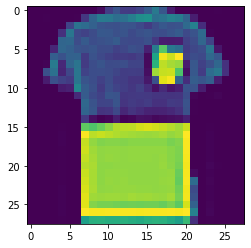

In [6]:
import matplotlib.pyplot as plt
plt.imshow(test_images[120])